<h2>Identifying Traits of Clients with Longer Stays at Detox Facility X</h2>

<h3>Background</h3>
Today we have a small dataset about various clients and their lengths of stay at a detox facility. The facility is interested in identifying which client characteristics are related to longer stays at the facility, which it has classified as 5 or more days.
<h3>Bottom Line</h3>
<li><b>Race:</b> According to the p-value, Hispanic is the only race that is predictive of stays longer than 5 days. Hispanic Individuals  have nearly double the odds (1.81) of having longer stays than than the baseline race group (White). While trends exist among other races, we cannot infer that these trends are due to race and not just a result of random chance. This might change if the sample size were to increase for other races (e.g. American Indian or Asian).
<br>
<br>
<li><b>Substance:</b> Individuals who used Cocaine  prior to entry have the highest odds of staying longer than 5 dys. This is followed, in order, by users of Methampethamines, "Other" Drugs, Marijuana, and Heroin.
<br>
<br>
<li><b>Frequency of Substance Use:</b> Individuals increase their odds of a longer stay by 3% with each additional day of substance use prior to entry. Thus, individuals who used their substance fewer days are less likely to stay as long, and individuals who used their substance every day of the 30 days leading up to detox have the highest likelihood of having longer stays.
<br>
<br>   
<li><b>Disability & Age:</b> Neither of these traits were predictive of longer stays at a statistically significant level. 
<h3>Recommendations</h3> In order to decrease long stays (5 or more days), this detox center should focus its efforts on a) Hispanic individuals who b) used Cocaine as their primary substance prior to entry, and c) used it the majority of the month prior to entry. In addition, it should target any other individuals who used Methamphetamines or "Other" Substances, and of this group, prioritize those who used their substance for more days prior to entry. 

<h3>Analysis</h3>

In [1]:
cd /Users/colinsorensen/Desktop/datapractice/Detox

/Users/colinsorensen/Desktop/datapractice/Detox


In [2]:
#Import modules

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf  
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression

In [3]:
#Import file and view columns

detox = pd.read_csv("detox.csv")
detox.head()
detox.shape

(702, 11)

In [4]:
#Check for duplicate client IDs
detox[detox['Client_ID'].duplicated()]['Client_ID'].count()

0

After importing the file, we can see that we have a fairly straightforward dataset with 702 rows and 11 columns. Each client has his/her own unique client ID, and we found from the above code that there are no duplicate client IDs. The variables are fairly straightforward--various demographic traits, plus the date of enrollment and exit from the program, the frequency of substance use in the last 30 days at both enrollment and exit, as well as the type of substance used at enrollment and exit.

In [5]:
detox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Client_ID                                     702 non-null    int64 
 1   Age                                           702 non-null    int64 
 2   Gender                                        702 non-null    object
 3   Race                                          702 non-null    object
 4   Disability                                    702 non-null    object
 5   Program Enrollment                            702 non-null    object
 6   Primary Substance at Enrollment               702 non-null    object
 7   Frequency of Primary Substance at Enrollment  702 non-null    int64 
 8   Program Exit Date                             702 non-null    object
 9   Primary Substance at Exit                     702 non-null    object
 10  Fr

While we have a program enrollment and program exit date, the table above shows us that they are stored as strings, so we must convert them to datetime data types. From there, we will subtract the enrollment date from the exit date for each client to identify each client's length of stay in days. 

In [6]:
#Convert program enrollment and exit date to datetime data types
detox[['Program Enrollment','Program Exit Date']] = detox[['Program Enrollment','Program Exit Date']].apply(pd.to_datetime,errors='coerce')

#Subtract enrollment date from exit date and assign to get number of days. Assign as new column.
detox['no_days'] = detox['Program Exit Date'] - detox['Program Enrollment']

After subtracting and calculating the number of days, we should then convert these to numeric datatypes.

In [7]:
#Convert datetime to string, split string based on space (to separate number from 'days'), and convert to float.

detox['no_days'] = detox['no_days'].astype(str)
detox['no_days'] = detox['no_days'].str.split(' ').str[0]
detox['no_days'] = detox['no_days'].astype(float)

Next, since the facility is interested in learning more about the traits that are predictive of stays that are 5 or more days, we can use the newly created 'no_days' column to create a new column, 'long_stay'. From here, we'll assign a 0 to any client with a stay shorter than 5 days and a 1 to any client with stays that were 5 days or longer.

In [8]:
#Assign 0 or 1 to each client (0 for <5 days and 1 for ≥5 days)
detox.loc[detox['no_days'] < 5,'long_stay'] = 0
detox.loc[detox['no_days'] >= 5,'long_stay'] = 1

Because age and substance frequency are both continuous variables, it will be easier to visualize them in the next step with bins.

In [9]:
#Create 'age_bins' and 'frequency_bins'

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
detox['age_bins'] = pd.cut(detox['Age'], bins)

bins = [0, 10, 20, 30]
detox['frequency_bins'] = pd.cut(detox['Frequency of Primary Substance at Enrollment'], bins)

Great! Now we're ready to visualize the data. Let's see the breakdown of clients staying longer than 5 days or more versus clients staying less than five days by gender, age, race, disability, primary substance, and frequency of substance use.

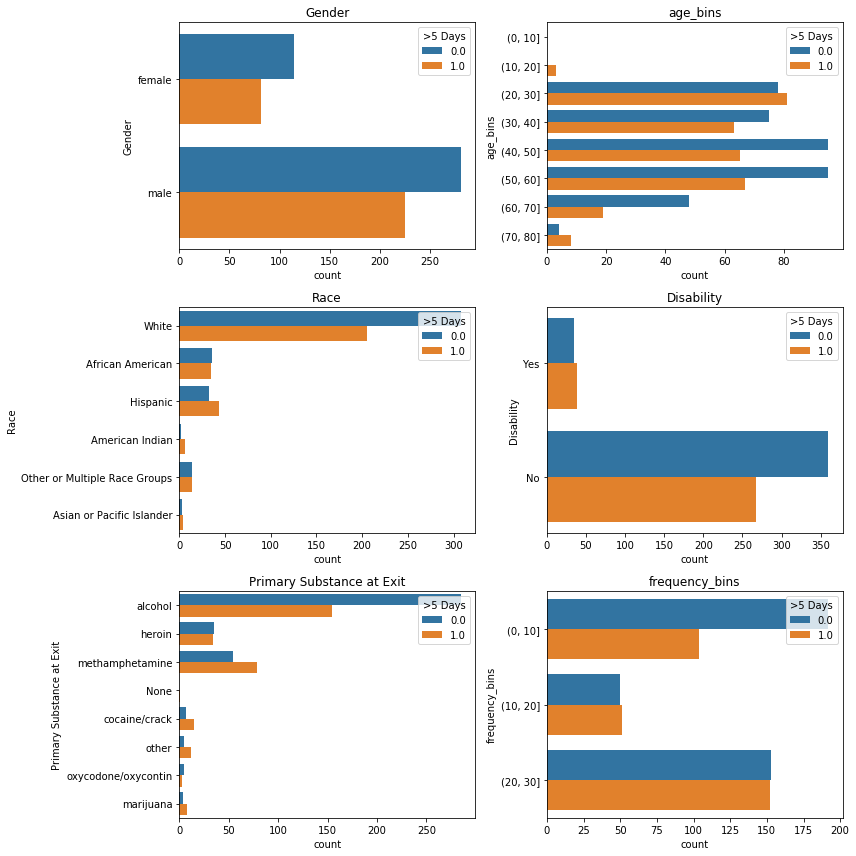

In [10]:
#Visualize the count for each variable
cols = ['Gender', 'age_bins', 'Race', 'Disability',
       'Primary Substance at Exit', 'frequency_bins']

n_rows = 3
n_cols = 2

#Subplot grid and figure size of each group.
fig, axs =  plt.subplots(n_rows,n_cols,figsize=[n_cols * 6, n_rows * 4])
for r in range (0, n_rows):
    for c in range(0, n_cols):
        
        i = r*n_cols + c #index to go through number of columns
        ax=axs[r][c]
        sns.countplot(y=detox[cols[i]],ax=ax,hue=detox["long_stay"])
        ax.set_title(cols[i])
        ax.legend(title='>5 Days',loc='upper right')
        plt.tight_layout()
        
plt.show()

Some pretty quick trends emerge from the above graphs. 
<ul>
<li><b>Gender:</b> Gender doesn't appear to have much effect; while males certainly access the detox center at higher rates, their proportion of individuals staying longer than 5 days is fairly similar to females.
<li><b>Age:</b> Individuals that are younger (20-40) appear to stay at higher rates than those in the 40-70 age range. However, it's not a perfect linear relationship, as individuals between 70-80 saw nearly double the number of individuals staying 5 days or more as those staying less than 5 days.</li>
<li><b>Race:</b> Hispanic and American Indian individuals had the highest rates of stayers, and White individuals had the lowest.
<li><b>Disability:</b> Individuals with disabilities stayed in detox at similar rates.
<li><b>Primary Substance at Exit:</b> Individuals using alcohol had the shortest stays by a wide margin. Individuals using methamphetamines, cocaine, or other were more likely to stay 5 days or more.
<li><b>Frequency of Use at Enrollment:</b> Unsurprisingly, individuals with less frequent substance use in the month prior to enrollment had shorter stays. For example, individuals were twice as likely to leave detox in less than 5 days if they had used their substance no more than 10 days in the month prior to enrollment. However, individuals appear to have had an equally likely chance of a long or short stay  once their substance use increased to 11 days or more.

So let's test some of these more in depth using logistic regression and Chi-Square. First we'll start with age. While we previously binned age to make it easier to read in the above graphs, we can keep it in its continuous form for the regression. We get the below results.

In [11]:
#Show logistic regression table for age
formula = "long_stay ~ Age"
results = smf.logit(formula,detox).fit()
print(results.summary())

#Show odds ratios
print("=====================================================================================================================================")
print("Odds Ratios")
print(np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.680653
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              long_stay   No. Observations:                  702
Model:                          Logit   Df Residuals:                      700
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 May 2020   Pseudo R-squ.:                0.006737
Time:                        19:15:36   Log-Likelihood:                -477.82
converged:                       True   LL-Null:                       -481.06
Covariance Type:            nonrobust   LLR p-value:                   0.01090
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3725      0.257      1.448      0.148      -0.132       0.877
Age           -0.0144      0.

We can see that age is statistically significant because it's p-value is less than .05. Furthermore, the odds for age are 98.5%, which means for each additional year in age, we can expect that the odds of an individual remaining in detox past 5 days decreases by ~1.5%. This makes sense--we saw in the above graphs that some individuals past 70 stay in detox for longer periods at higher rates, so this data likely throws off the model.

Next, we'll move on to frequency of substance use in the 30 days prior to enrollment. Because frequency is also an ordinal variable, we'll start with logistic regression.

In [12]:
#Rename column for use in logistic regression model
detox = detox.rename(columns={'Frequency of Primary Substance at Enrollment':'Frequency_Use'})

#Show logistic regression table for frequency of use
formula = "long_stay ~ Frequency_Use"
results = smf.logit(formula,detox).fit()
print(results.summary())

#Show odds ratios
print("=====================================================================================================================================")
print("Odds Ratios")
print(np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.677328
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              long_stay   No. Observations:                  702
Model:                          Logit   Df Residuals:                      700
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 May 2020   Pseudo R-squ.:                 0.01159
Time:                        19:15:36   Log-Likelihood:                -475.48
converged:                       True   LL-Null:                       -481.06
Covariance Type:            nonrobust   LLR p-value:                 0.0008407
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6158      0.135     -4.568      0.000      -0.880      -0.352
Frequency_Use     0.

Again, we find a statistically significant relationship at .001. From the odds, we can see that there is a positive relationship. For every additional day of substance use, the odds of stay longer than 5 days increases by 2.1%.

Race is up next and we can use Chi-Square since it's a nominal variable. We could also use logistic regression--but I'm mostly just curious to see if the variable as a whole is statistically signiicant and worth including in our final model. Chi-Square will do that for us.

In [13]:
#Calculate chi-square for Race
x=detox.Race
y=detox.long_stay

print(pd.crosstab(x,y,normalize='index'))

chi2, p, dof, expected = chi2_contingency(pd.crosstab(x,y))
print (f'Chi-square Statistic : {chi2} ,p-value: {p}')

long_stay                           0.0       1.0
Race                                             
African American               0.507042  0.492958
American Indian                0.250000  0.750000
Asian or Pacific Islander      0.428571  0.571429
Hispanic                       0.426667  0.573333
Other or Multiple Race Groups  0.500000  0.500000
White                          0.600390  0.399610
Chi-square Statistic : 13.63348660761484 ,p-value: 0.018113061258914466


With a p-value of .018, race is indeed statistically significant. This is not surprising--there are some major discrepancies in the percentages above. With that information, we can include it in our final model below.

Lastly, let's test out primary substance at enrollment, since this is the substance that brought them to detox in the first place. Again, we just want a p-value, so we can use Chi-Square.

In [14]:
#Rename column for use in logistic regression model
detox = detox.rename(columns={'Primary Substance at Enrollment':'Primary_Substance'})

#Calculate chi-square for Substance Prior to Enrollment
x=detox['Primary_Substance']
y=detox.long_stay

chi2, p, dof, expected = chi2_contingency(pd.crosstab(x,y))
print (f'Chi-square Statistic : {chi2} ,p-value: {p}')

Chi-square Statistic : 35.260088653668284 ,p-value: 3.837216476806439e-06


Such a small p-value! It appears that the type of substance an individual uses prior to entry has a significant affect on their length of stay at this detox facility. So summarized, we found the following p-values for each variable:

<li><b>Age:</b> .011
<li><b>Frequency of Substance Use:</b> .001
<li><b>Race:</b> .018
<li><b>Substance Prior to Enrollment:</b> 3.837216476806439e-06 (small)
<br>
<br> 
It therefore makes sense to include each variable in a multivariable regression model. Note: while I did not include them in this notebook, I did conduct similar tests on Gender and Disability--neither of which were statistically significant.
<br>
<br> 
A multi-variable regression with each of the above values appears below. I chose to use 'White' as the base category for Race and 'Alcohol' as the base category for substance, because a) they have the highest n-values for their respective categories, and b) they are the easiest categories for contextualizing the results.

In [15]:
#Show logistic regression table for multivariable regression
formula = "long_stay ~ Age + Frequency_Use + C(Race, Treatment('White')) + C(Primary_Substance, Treatment('alcohol'))"
results = smf.logit(formula,detox).fit()
print(results.summary())

#Show second table which classifies each variable as statistically significant or not ("True" or "False")
print("Variables With P-Values<.05")
print(results.pvalues<.05)

#Show odds ratios
print("=====================================================================================================================================")
print("Odds Ratios")
print(np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.633462
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              long_stay   No. Observations:                  702
Model:                          Logit   Df Residuals:                      688
Method:                           MLE   Df Model:                           13
Date:                Fri, 29 May 2020   Pseudo R-squ.:                 0.07560
Time:                        19:15:36   Log-Likelihood:                -444.69
converged:                       True   LL-Null:                       -481.06
Covariance Type:            nonrobust   LLR p-value:                 2.506e-10
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------

<h3>Conclusions</h3>
There is a lot to see in our final model. First, let's go through the second table, which quickly summarizes any variable with a p-value less than .05. These variables/categories: are <b>Hispanic, Cocaine/Crack, Heroin, Marijuana, Methampethamine, Other (Drug),</b> and <b>Frequency of Use.</b>
<br>
<br>
Other variables lost their significance when combined with other variables, like Age. However, as already discussed, this is likely a result of an increase in stayers in the older age brackets. It was also a bit surprising to see that American Indian was not statistically significant, since our graphs at the beginning showed such a large number of American Indians staying compared to those that exited in less than 5 days. However, this was likely due to the small sample size of American Indians.
<br>
<br>
The third table shows the coefficients converted to percentages. Looking only at those values that are statisically significant, we can draw the following inferences:
<br>
<br>
<li><b>Race:</b> According to the p-value, Hispanic is the only race that is predictive of stays longer than 5 days. Individuals who are Hispanic have 1.81 higher odds of having longer stays than our baseline race group (White). While trends exist among other races, we cannot infer that these trends are due to race and not just a result of random chance.
<br>
<br>
<li><b>Substance:</b> Individuals who use Cocaine, Methampethamine, Other, Marijuana, or Heroin have 4.4, 3.42, 3.41, 3.13, and 1.97 higher odds of having long stays compared to the baseline group (Alcohol), respectively. In other words, individuals who used Cocaine prior to entry into detox have the highest likelihood of staying longer than five days, followed by Methamphetamine and Other.
<br>
<br>
<li><b>Frequency of Substance Use:</b> With an odds ratio of 1.03, we can infer than individuals increase their odds of a longer stay by .03 with each additional day that they used their substance prior to entry. Therefore, individuals who used their substance fewer days are less likely to stay as long, and individuals who used their substance every day of the 30 days leading up to detox have the highest likelihood of having longer stays. 
<h3>Recommendations</h3> In order to decrease long stays (5 or more days), this detox center should focus its efforts on a) Hispanic individuals who b) used Cocaine as their primary substance prior to entry, and c) used it the majority of the month prior to entry. In addition, it should target any other individuals who used Methamphetamines or "Other" Substances, and of this group, prioritize those who used their substance for more days prior to entry. 